<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Используем-OHE-обработку" data-toc-modified-id="Используем-OHE-обработку-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Используем OHE-обработку</a></span></li><li><span><a href="#Формируем-выборки" data-toc-modified-id="Формируем-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Формируем выборки</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Использование-взвешенных-классов" data-toc-modified-id="Использование-взвешенных-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Использование взвешенных классов</a></span></li><li><span><a href="#Использование-уменьшенной-выборки" data-toc-modified-id="Использование-уменьшенной-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Использование уменьшенной выборки</a></span></li><li><span><a href="#Использование-увеличенной-выборки" data-toc-modified-id="Использование-увеличенной-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Использование увеличенной выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-тестированию" data-toc-modified-id="Подготовка-к-тестированию-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка к тестированию</a></span></li><li><span><a href="#Финальное-тестирование" data-toc-modified-id="Финальное-тестирование-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Финальное тестирование</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Начнём наш проект с чтения файла и загрузки необходимых библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore") # необходимо для скрытия предупреждений, которые появятся по ходу выполнения программы

In [4]:
data = pd.read_csv('/datasets/Churn.csv')

Посмотрим на наши данные

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Видно, что данные не до конца подготовлены. Так, в столбце `Tenure` есть пропущенные значения. Считаю, что нужно заменить нулевыми значениями.

In [8]:
data['Tenure'] = data['Tenure'].fillna(0)

Проверим, есть ли явные дубликаты.

In [10]:
data.duplicated().sum()

0

Также рассмотрим категориальные стоблцы на предмет неявных дубликатов.

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [14]:
data['Surname'].value_counts()

Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Mundy        1
Retana       1
St Clair     1
Kingsley     1
Lynton       1
Name: Surname, Length: 2932, dtype: int64

In [15]:
data['CustomerId'].value_counts()

15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: CustomerId, Length: 10000, dtype: int64

Неявные дубликаты в столбцах `Geography` и `Gender` не найдены, столбцы можно будет преобразовать в количественные при помощи OHE. А вот в столбце `Surname` находится 2932 уникальных значения. Этот столбец не несёт ценности в качестве признака для модели, которую мы будем обучать, его можно будет удалить позже.

Столбец `RowNumber` тоже можно удалить, так как он повторяет информацию самого датасета и также не несёт ценности в качестве признака для модели. К удалению подлежит ещё и столбец `CustomerId`, так как в нём находится 10000 уникальных значений, которые являются уникальными индентификаторами пользователей.

In [16]:
data = data.drop(columns = ['Surname', 'RowNumber', 'CustomerId'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Целью проекта является выявление прогноза, уйдёт ли клиент в ближайшее время или нет. Следовательно, целевым признаком в нашей модели будет столбец `Exited`.

**Вывод**

Был открыт датасет, проверен на предмет дубликатов, как явных, так и неявных. Были заполнены пропущенные значения, и обозначен целевой признак.

## Исследование задачи

### Используем OHE-обработку

In [19]:
data = pd.get_dummies(data, drop_first=True)

In [20]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


### Формируем выборки

Формируем признаки и целевой признак.

In [21]:
features = data.drop('Exited', axis = 1)
target = data['Exited']

Разделим датасет на обучающую, валидационную и тестирующую выборки в соотношении 60:20:20.

In [22]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.40, random_state = 12345)

In [23]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size = 0.50, random_state = 12345)

Проверяем, правильно ли разделились выборки.

In [24]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [25]:
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(6000,)
(2000,)
(2000,)


Займёмся масштабированием количественных данных, а именно стандартизацией, поместив соответствующие столбцы в список.

In [26]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [27]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [28]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0


In [29]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,585,35,2.0,0.00,2,1,0,98621.04,0,0,0
5799,625,45,3.0,0.00,1,1,1,184474.15,0,0,0
5511,667,32,0.0,103846.65,1,1,0,20560.69,1,0,1
7365,568,36,10.0,153610.61,1,1,1,54083.80,0,1,0
7367,606,42,10.0,0.00,2,1,0,177938.52,0,1,1


In [30]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,438,38,2.0,0.00,2,1,0,136859.55,0,0,1
5709,644,39,9.0,0.00,1,1,0,3740.93,0,0,0
7117,564,31,5.0,121461.87,1,1,1,20432.09,0,1,1
7775,628,40,10.0,0.00,2,1,0,103832.58,0,1,1
8735,728,30,10.0,114835.43,1,0,1,37662.49,0,0,1


In [31]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [32]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0


In [33]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-0.825373,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.503694,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.468729,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.748053,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.748053,-1.233163,0.830152,1,0,1.358533,0,1,1


In [34]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-0.825373,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.426375,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.139662,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.748053,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.748053,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Подбор гиперпараметров

Сначала подберём самое лучшее количество деревьев в случайном лесу - гиперпараметр `n_estimator`.

Теперь ищем лучшую максимальную глубину деревьев - гиперпараметр `max_depth`.

In [35]:
best_f1_score = 0
best_depth = 0
best_estimator = 0

for estimator in range(20, 151, 5):
    for depth in range(1, 20):
        model =  RandomForestClassifier(random_state = 12345, n_estimators = estimator, max_depth = depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > best_f1_score:
            best_f1_score = f1_score(target_valid, predicted_valid)
            best_depth = depth
            best_estimator = estimator
print('Лучшая F1-мера равна', best_f1_score, 'при максимальной глубине равной', best_depth, 'и количеству деревьев равному', best_estimator)

Лучшая F1-мера равна 0.6 при максимальной глубине равной 17 и количеству деревьев равному 25


Теперь подберём гиперпараметр `max_depth` для дерева решений.

In [36]:
best_f1_score = 0
best_depth = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid)
        best_depth = depth
print('Лучшая F1-мера равна', best_f1_score, 'при максимальной глубине равной', best_depth)

Лучшая F1-мера равна 0.5786516853932585 при максимальной глубине равной 9


In [37]:
model_dt = DecisionTreeClassifier(random_state = 12345, max_depth = 9)
model_dt.fit(features_train, target_train)
dt_accuracy = model_dt.score(features_valid, target_valid)

model_rf = RandomForestClassifier(random_state = 12345, n_estimators = 70, max_depth = 19)
model_rf.fit(features_train, target_train)
rf_accuracy = model_rf.score(features_valid, target_valid)

model_lr = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_lr.fit(features_train, target_train)
lr_accuracy = model_lr.score(features_valid, target_valid)

print("Точность: ")
print("Дерево решений -" , dt_accuracy) 
print("Случайный лес -", rf_accuracy)
print("Логистическая регрессия -", lr_accuracy)

Точность: 
Дерево решений - 0.85
Случайный лес - 0.8585
Логистическая регрессия - 0.8025


### Исследование баланса классов

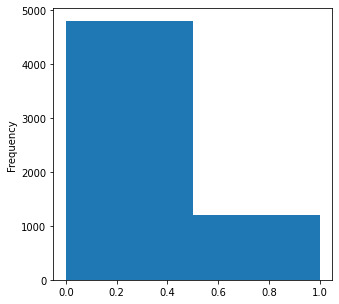

In [38]:
target_train.value_counts(normalize = 1)
target_train.plot(kind ='hist', bins=2, figsize=(5, 5)); # Строим диаграмму баланса классов

In [39]:
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Имеем разделение классов ~79% к 21%, можно сделать вывод об их дисбалансе.

Проверим баланс классов отдельно для разных моделей при помощи предсказаний.

In [40]:
dt_predicted = pd.Series(model_dt.predict(features_valid))
dt_balance = dt_predicted.value_counts(normalize = 1)
rf_predicted = pd.Series(model_rf.predict(features_valid))
rf_balance = rf_predicted.value_counts(normalize = 1)
lr_predicted = pd.Series(model_lr.predict(features_valid))
lr_balance = lr_predicted.value_counts(normalize = 1)

In [41]:
print('Баланс классов')
print("Дерево решений: ") 
print(dt_balance) 
print("Случайный лес: ")
print(rf_balance) 
print("Логистическая регрессия: ")
print(lr_balance) 

Баланс классов
Дерево решений: 
0    0.853
1    0.147
dtype: float64
Случайный лес: 
0    0.8715
1    0.1285
dtype: float64
Логистическая регрессия: 
0    0.9125
1    0.0875
dtype: float64


Для каждой из трёх моделей построим матрицу ошибок, вычислим полноту, точность, F1-меру

**Дерево решений**

In [42]:
print(confusion_matrix(target_valid, dt_predicted))
print("Полнота -" , recall_score(target_valid, dt_predicted))
print("Точность -", precision_score(target_valid, dt_predicted))
print("F1-мера -", f1_score(target_valid, dt_predicted))

[[1494   88]
 [ 212  206]]
Полнота - 0.49282296650717705
Точность - 0.7006802721088435
F1-мера - 0.5786516853932585


**Случайный лес**

In [43]:
print(confusion_matrix(target_valid, rf_predicted))
print("Полнота -" , recall_score(target_valid, rf_predicted))
print("Точность -", precision_score(target_valid, rf_predicted))
print("F1-мера -", f1_score(target_valid, rf_predicted))

[[1521   61]
 [ 222  196]]
Полнота - 0.4688995215311005
Точность - 0.7626459143968871
F1-мера - 0.5807407407407408


**Логистическая регрессия**

In [44]:
print(confusion_matrix(target_valid, lr_predicted))
print("Полнота -" , recall_score(target_valid, lr_predicted))
print("Точность -", precision_score(target_valid, lr_predicted))
print("F1-мера -", f1_score(target_valid, lr_predicted))

[[1506   76]
 [ 319   99]]
Полнота - 0.23684210526315788
Точность - 0.5657142857142857
F1-мера - 0.33389544688026984


Если сравнивать F1-меры, то лучший результат показывает модель случайного леса. Сравним AUC-ROC у этих трёх моделей. 

AUC-ROC для дерева решений равен 0.7899719632952051
AUC-ROC для случайного леса равен 0.8410119224045632
AUC-ROC для дерева решений равен 0.7586317967081824


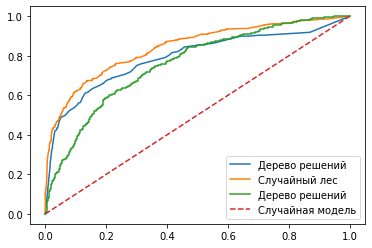

In [45]:
dt_probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, dt_probabilities_one_valid)
auc_roc_dt = roc_auc_score(target_valid, dt_probabilities_one_valid)

print('AUC-ROC для дерева решений равен', auc_roc_dt)
plt.plot(fpr, tpr, label = 'Дерево решений');

rf_probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, rf_probabilities_one_valid)
auc_roc_rf = roc_auc_score(target_valid, rf_probabilities_one_valid)

print('AUC-ROC для случайного леса равен', auc_roc_rf)
plt.plot(fpr, tpr, label = 'Случайный лес');

lr_probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, lr_probabilities_one_valid)
auc_roc_lr = roc_auc_score(target_valid, lr_probabilities_one_valid)

print('AUC-ROC для линейной регрессии равен', auc_roc_lr)
plt.plot(fpr, tpr, label = 'Линейная регрессия');

plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Случайная модель')

plt.legend();

Показатель AUC-ROC, как и F1-мера, самый большой для модели случайного леса. 

**Вывод**

Был выявлен дисбаланс классов в соотношении 4:1 (неправильные ответы:правильные ответы).
 Были выявлены показатели AUC-ROC и F1-меры.

## Борьба с дисбалансом

Существует три способа борьбы с дисбалансом: 
* использовать взвешенные классы
* использовать уменьшенную выборку
* использовать увеличенную выборку

### Использование взвешенных классов

Чтобы использовать взвешенные классы, достаточно просто добавить параметр `class_weight` при инициализации модели.

Для начала подберём гиперпараметры подобно прошлому разу.

In [46]:
best_f1_score = 0
best_depth = 0
best_estimator = 0

for estimator in range(20, 151, 5):
    for depth in range(1, 20):
        model =  RandomForestClassifier(random_state = 12345, n_estimators = estimator, max_depth = depth, class_weight = 'balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > best_f1_score:
            best_f1_score = f1_score(target_valid, predicted_valid)
            best_depth = depth
            best_estimator = estimator
print('Лучшая F1-мера равна', best_f1_score, 'при максимальной глубине равной', best_depth, 'и количеству деревьев равному', best_estimator)

Лучшая F1-мера равна 0.6336633663366337 при максимальной глубине равной 8 и количеству деревьев равному 150


In [47]:
best_f1_score = 0
best_depth = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid)
        best_depth = depth
print('Лучшая F1-мера для дерева решений равна', best_f1_score, 'при максимальной глубине равной', best_depth)

Лучшая F1-мера для дерева решений равна 0.5963791267305644 при максимальной глубине равной 5


In [48]:
model_dt = DecisionTreeClassifier(random_state = 12345, max_depth = 5, class_weight='balanced')
model_dt.fit(features_train, target_train)
dt_predicted = pd.Series(model_dt.predict(features_valid))
print('Дерево решений')
print('F1-мера -', f1_score(target_valid, dt_predicted))

dt_probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]
auc_roc_dt = roc_auc_score(target_valid, dt_probabilities_one_valid)
print('AUC-ROC для дерева решений равен', auc_roc_dt)


model_rf = RandomForestClassifier(random_state = 12345, n_estimators = 150, max_depth = 8, class_weight='balanced')
model_rf.fit(features_train, target_train)
rf_predicted = pd.Series(model_rf.predict(features_valid))
print('Случайный лес')
print('F1-мера -', f1_score(target_valid, rf_predicted))

rf_probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]
auc_roc_rf = roc_auc_score(target_valid, rf_probabilities_one_valid)
print('AUC-ROC для случайного леса равен', auc_roc_rf)


model_lr = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)
lr_predicted = pd.Series(model_lr.predict(features_valid))
print('Логистическая регрессия')
print('F1-мера -', f1_score(target_valid, lr_predicted))

lr_probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]
auc_roc_lr = roc_auc_score(target_valid, lr_probabilities_one_valid)
print('AUC-ROC для логистической регрессии равен', auc_roc_lr)

Дерево решений
F1-мера - 0.5963791267305644
AUC-ROC для дерева решений равен 0.8310244134068074
Случайный лес
F1-мера - 0.6336633663366337
AUC-ROC для случайного леса равен 0.857832433053672
Логистическая регрессия
F1-мера - 0.4888888888888888
AUC-ROC для логистической регрессии равен 0.7635798063138539


Со взмешенными классами F1-мера и AUC-ROC слегка уменьшились у случайного леса и сильно увеличились у дерева решений и логистической регрессии.

### Использование уменьшенной выборки

Вспомним, что отношение неправильных ответов к правильным равно 4 к 1. 
Уменьшим выборку данных с неправильными ответами примерно в 4 раза, используя функцию downsample.

In [49]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac = fraction, random_state = 12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state = 12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: Exited, dtype: int64


Неправильные и правильные ответы по результатам функции примерно равны. Теперь применим его к нашим моделям.

Подберём гиперпараметры 

In [50]:
best_f1_score = 0
best_depth = 0
best_estimator = 0

for estimator in range(20, 151, 5):
    for depth in range(1, 20):
        model =  RandomForestClassifier(random_state = 12345, n_estimators = estimator, max_depth = depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > best_f1_score:
            best_f1_score = f1_score(target_valid, predicted_valid)
            best_depth = depth
            best_estimator = estimator
print('Лучшая F1-мера равна', best_f1_score, 'при максимальной глубине равной', best_depth, 'и количеству деревьев равному', best_estimator)

Лучшая F1-мера равна 0.6049618320610687 при максимальной глубине равной 11 и количеству деревьев равному 115


In [51]:
best_f1_score = 0
best_depth = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid)
        best_depth = depth
print('Лучшая F1-мера для дерева решений равна', best_f1_score, 'при максимальной глубине равной', best_depth)

Лучшая F1-мера для дерева решений равна 0.5931174089068827 при максимальной глубине равной 5


In [52]:
model_dt = DecisionTreeClassifier(random_state = 12345, max_depth = 5)
model_dt.fit(features_downsampled, target_downsampled)
dt_predicted = pd.Series(model_dt.predict(features_valid))
print('Дерево решений')
print('F1-мера -', f1_score(target_valid, dt_predicted))

dt_probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]
auc_roc_dt = roc_auc_score(target_valid, dt_probabilities_one_valid)
print('AUC-ROC для дерева решений равен', auc_roc_dt)


model_rf = RandomForestClassifier(random_state = 12345, n_estimators = 115, max_depth = 11)
model_rf.fit(features_downsampled, target_downsampled)
rf_predicted = pd.Series(model_rf.predict(features_valid))
print('Случайный лес')
print('F1-мера -', f1_score(target_valid, rf_predicted))

rf_probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]
auc_roc_rf = roc_auc_score(target_valid, rf_probabilities_one_valid)
print('AUC-ROC для случайного леса равен', auc_roc_rf)


model_lr = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_lr.fit(features_downsampled, target_downsampled)
lr_predicted = pd.Series(model_lr.predict(features_valid))
print('Логистическая регрессия')
print('F1-мера -', f1_score(target_valid, lr_predicted))

lr_probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]
auc_roc_lr = roc_auc_score(target_valid, lr_probabilities_one_valid)
print('AUC-ROC для логистической регрессии равен', auc_roc_lr)

Дерево решений
F1-мера - 0.5931174089068827
AUC-ROC для дерева решений равен 0.82291433531536
Случайный лес
F1-мера - 0.6049618320610687
AUC-ROC для случайного леса равен 0.8489057519099438
Логистическая регрессия
F1-мера - 0.4892703862660944
AUC-ROC для логистической регрессии равен 0.762673981816972


Используя уменьшенную выборку, F1-мера значительно увеличилась у всех трёх моделей.

### Использование увеличенной выборки

In [53]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: Exited, dtype: int64


Подберём гиперпараметры

In [54]:
for estimator in range(20, 151, 5):
    for depth in range(1, 20):
        model =  RandomForestClassifier(random_state = 12345, n_estimators = estimator, max_depth = depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        if f1_score(target_valid, predicted_valid) > best_f1_score:
            best_f1_score = f1_score(target_valid, predicted_valid)
            best_depth = depth
            best_estimator = estimator
print('Лучшая F1-мера равна', best_f1_score, 'при максимальной глубине равной', best_depth, 'и количеству деревьев равному', best_estimator)

Лучшая F1-мера равна 0.6334951456310681 при максимальной глубине равной 13 и количеству деревьев равному 150


In [55]:
best_f1_score = 0
best_depth = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > best_f1_score:
        best_f1_score = f1_score(target_valid, predicted_valid)
        best_depth = depth
print('Лучшая F1-мера для дерева решений равна', best_f1_score, 'при максимальной глубине равной', best_depth)

Лучшая F1-мера для дерева решений равна 0.5963791267305644 при максимальной глубине равной 5


In [56]:
model_dt = DecisionTreeClassifier(random_state = 12345, max_depth = 5)
model_dt.fit(features_upsampled, target_upsampled)
dt_predicted = pd.Series(model_dt.predict(features_valid))
print('Дерево решений')
print('F1-мера -', f1_score(target_valid, dt_predicted))

dt_probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]
auc_roc_dt = roc_auc_score(target_valid, dt_probabilities_one_valid)
print('AUC-ROC для дерева решений равен', auc_roc_dt)


model_rf = RandomForestClassifier(random_state = 12345, n_estimators = 150, max_depth = 13)
model_rf.fit(features_upsampled, target_upsampled)
rf_predicted = pd.Series(model_rf.predict(features_valid))
print('Случайный лес')
print('F1-мера -', f1_score(target_valid, rf_predicted))

rf_probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]
auc_roc_rf = roc_auc_score(target_valid, rf_probabilities_one_valid)
print('AUC-ROC для случайного леса равен', auc_roc_rf)


model_lr = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_lr.fit(features_upsampled, target_upsampled)
lr_predicted = pd.Series(model_lr.predict(features_valid))
print('Логистическая регрессия')
print('F1-мера -', f1_score(target_valid, lr_predicted))

lr_probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]
auc_roc_lr = roc_auc_score(target_valid, lr_probabilities_one_valid)
print('AUC-ROC для логистической регрессии равен', auc_roc_lr)

Дерево решений
F1-мера - 0.5963791267305644
AUC-ROC для дерева решений равен 0.8310244134068074
Случайный лес
F1-мера - 0.6334951456310681
AUC-ROC для случайного леса равен 0.84782148452386
Логистическая регрессия
F1-мера - 0.4888888888888888
AUC-ROC для логистической регрессии равен 0.7634769748183815


Используя уменьшенную выборку, F1-мера слегка увеличилась у случайного леса, и значительно - у дерева решений и логистической регрессии.

**Вывод**

Было произведено сравнение трёх видов борьбы с дисбалансом классов: с взвешенными классами, при помощи downsample и upsample.

## Тестирование модели

### Подготовка к тестированию

В качестве лучшей модели возьмём случайный лес . Объединим тренировочную выборку с валидационной, чтобы было больше данных. Также обновим размеры увеличенной и уменьшенной выборок соответствующим образом.

In [57]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 4)
features_downsampled, target_downsampled = downsample(features_full_train, target_full_train, 0.25)

### Финальное тестирование

In [58]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 25, max_depth = 17)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес с дисбалансом классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Точность', precision_score(target_test, predicted_test))
print('Полнота', recall_score(target_test, predicted_test))
print('F1-мера', f1_score(target_test, predicted_test))
print()

Случайный лес с дисбалансом классов
Точность попадания по классам 0.8445
Точность 0.7204724409448819
Полнота 0.4326241134751773
F1-мера 0.5406203840472673



In [59]:
model_balanced = RandomForestClassifier(random_state = 12345, n_estimators = 150, max_depth = 8, class_weight = 'balanced')
model_balanced.fit(features_train, target_train)
predicted_test_balanced = model_balanced.predict(features_test)
print('Случайный лес со взвешенными классами')
print('Точность попадания по классам -', accuracy_score(target_test, predicted_test_balanced))
print('Точность -', precision_score(target_test, predicted_test_balanced))
print('Полнота -', recall_score(target_test, predicted_test_balanced))
print('F1-мера -', f1_score(target_test, predicted_test_balanced))
print()

Случайный лес со взвешенными классами
Точность попадания по классам - 0.822
Точность - 0.5668662674650699
Полнота - 0.6713947990543735
F1-мера - 0.6147186147186147



In [60]:
model_upsampled = RandomForestClassifier(random_state = 12345, n_estimators = 150, max_depth = 13)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_test_upsampled = model_upsampled.predict(features_test)
print('Случайный лес с увеличенной выборкой значений "1"')
print('Точность попадания по классам -', accuracy_score(target_test, predicted_test_upsampled))
print('Точность -', precision_score(target_test, predicted_test_upsampled))
print('Полнота -', recall_score(target_test, predicted_test_upsampled))
print('F1-мера -', f1_score(target_test, predicted_test_upsampled))
print()

Случайный лес с увеличенной выборкой значений "1"
Точность попадания по классам - 0.8365
Точность - 0.6121495327102804
Полнота - 0.6193853427895981
F1-мера - 0.6157461809635723



In [61]:
model_downsampled = RandomForestClassifier(random_state = 12345, n_estimators = 115, max_depth = 11)
model_downsampled.fit(features_downsampled, target_downsampled)
predicted_test_downsampled = model_downsampled.predict(features_test)
print('Случайный лес с уменьшенной выборкой значений "0"')
print('Точность попадания по классам -', accuracy_score(target_test, predicted_test_downsampled))
print('Точность -', precision_score(target_test, predicted_test_downsampled))
print('Полнота -', recall_score(target_test, predicted_test_downsampled))
print('F1-мера -', f1_score(target_test, predicted_test_downsampled))
print()

Случайный лес с уменьшенной выборкой значений "0"
Точность попадания по классам - 0.777
Точность - 0.48244274809160304
Полнота - 0.7470449172576832
F1-мера - 0.5862708719851577



Видно, что случайный лес со взвешенными классами, случайный лес с увеличенной выборкой значений "1" и случайный лес с уменьшенной выборкой значений "0" получили значение F1-меры, которое больше 0.59. Теперь посчитаем AUC-ROC и поместим эту кривую для каждой из моделей на график.

AUC-ROC случайного леса с дисбалансом: 0.8398431351385385
AUC-ROC случайного леса со взвешенными классами: 0.856788857557891
AUC-ROC случайного леса с увеличенной выборкой класса "1": 0.8569102839128069
AUC-ROC случайного леса с уменьшенной выборкой класса "0": 0.8564635548539811


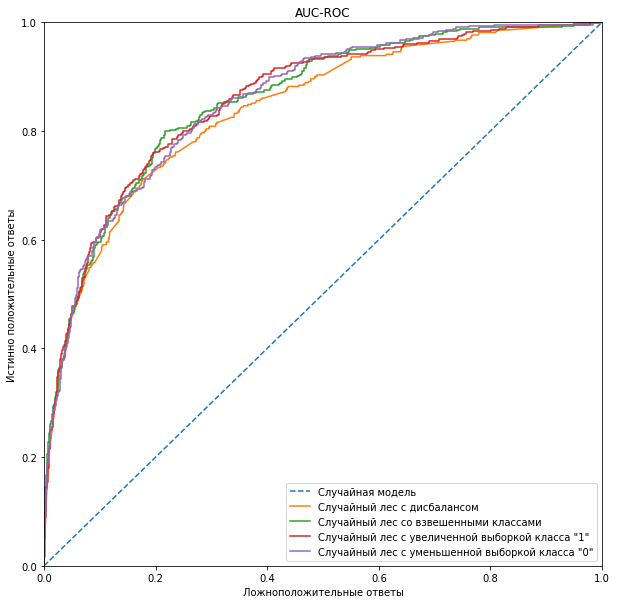

In [62]:
plt.figure(figsize = [10, 10])
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Случайная модель')


probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC случайного леса с дисбалансом:', auc_roc)
plt.plot(fpr, tpr, label = 'Случайный лес с дисбалансом')


probabilities_balanced_test = model_balanced.predict_proba(features_test)
probabilities_balanced_one_test = probabilities_balanced_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_balanced_one_test)
auc_roc_balanced = roc_auc_score(target_test, probabilities_balanced_one_test)
print('AUC-ROC случайного леса со взвешенными классами:', auc_roc_balanced)
plt.plot(fpr, tpr, label = 'Случайный лес со взвешенными классами')


probabilities_upsampled_test = model_upsampled.predict_proba(features_test)
probabilities_upsampled_one_test = probabilities_upsampled_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_upsampled_one_test)
auc_roc_upsampled = roc_auc_score(target_test, probabilities_upsampled_one_test)
print('AUC-ROC случайного леса с увеличенной выборкой класса "1":', auc_roc_upsampled)
plt.plot(fpr, tpr, label = 'Случайный лес с увеличенной выборкой класса "1"')


probabilities_downsampled_test = model_downsampled.predict_proba(features_test)
probabilities_downsampled_one_test = probabilities_downsampled_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_downsampled_one_test)
auc_roc_downsampled = roc_auc_score(target_test, probabilities_downsampled_one_test)
print('AUC-ROC случайного леса с уменьшенной выборкой класса "0":', auc_roc_downsampled)
plt.plot(fpr, tpr, label = 'Случайный лес с уменьшенной выборкой класса "0"')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel("Ложноположительные ответы")
plt.ylabel("Истинно положительные ответы")

plt.legend()

plt.title("AUC-ROC")
plt.show()

Видно, что AUC-ROC в среднем равен 0.85 для всех четырёх моделей, которые были рассмотрены.

## Вывод

В финальном тестировании 3 из 4 моделей прошли порог F1-меры в 0.59 - случайный лес со взвешенными классами, случайный лес с увеличенной выборкой значений "1" и случайный лес с уменьшенной выборкой значений "0".


В итоге исследования была получена лучшая модель - случайный лес, которая показала лучшие показатели по AUC-ROC и F1-мере. Эта модель была проверена с учётом дисбаланса, взвешенными классами, а также уменьшенной и увеличенной выборками. Лучше всего себя показал метод с увеличенной выборкой значений "1".